<a href="https://colab.research.google.com/github/dimLMT/Metabolic-Syndrome-Forecast/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/Metabolic  Syndrome.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(fpath)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


# Inspect and clean the Data

In [8]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.\n')
# Display the column names, count of non-null values, and their datatypes
df.info()

There are 2401 rows, and 15 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)

In [9]:
df['seqn'].nunique()

2401

In [10]:
#'seqn' column has 2401 unique values which is 100.0% cardinality.
df = df.set_index('seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [11]:
# Display the descriptive statistics for the numeric columns
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [12]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [15]:
cat_cols = df.select_dtypes('object').columns
for cols in cat_cols:
  print(df[cols].value_counts(),'\n')

Female    1211
Male      1190
Name: Sex, dtype: int64 

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64 

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64 

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64 



In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


<Axes: >

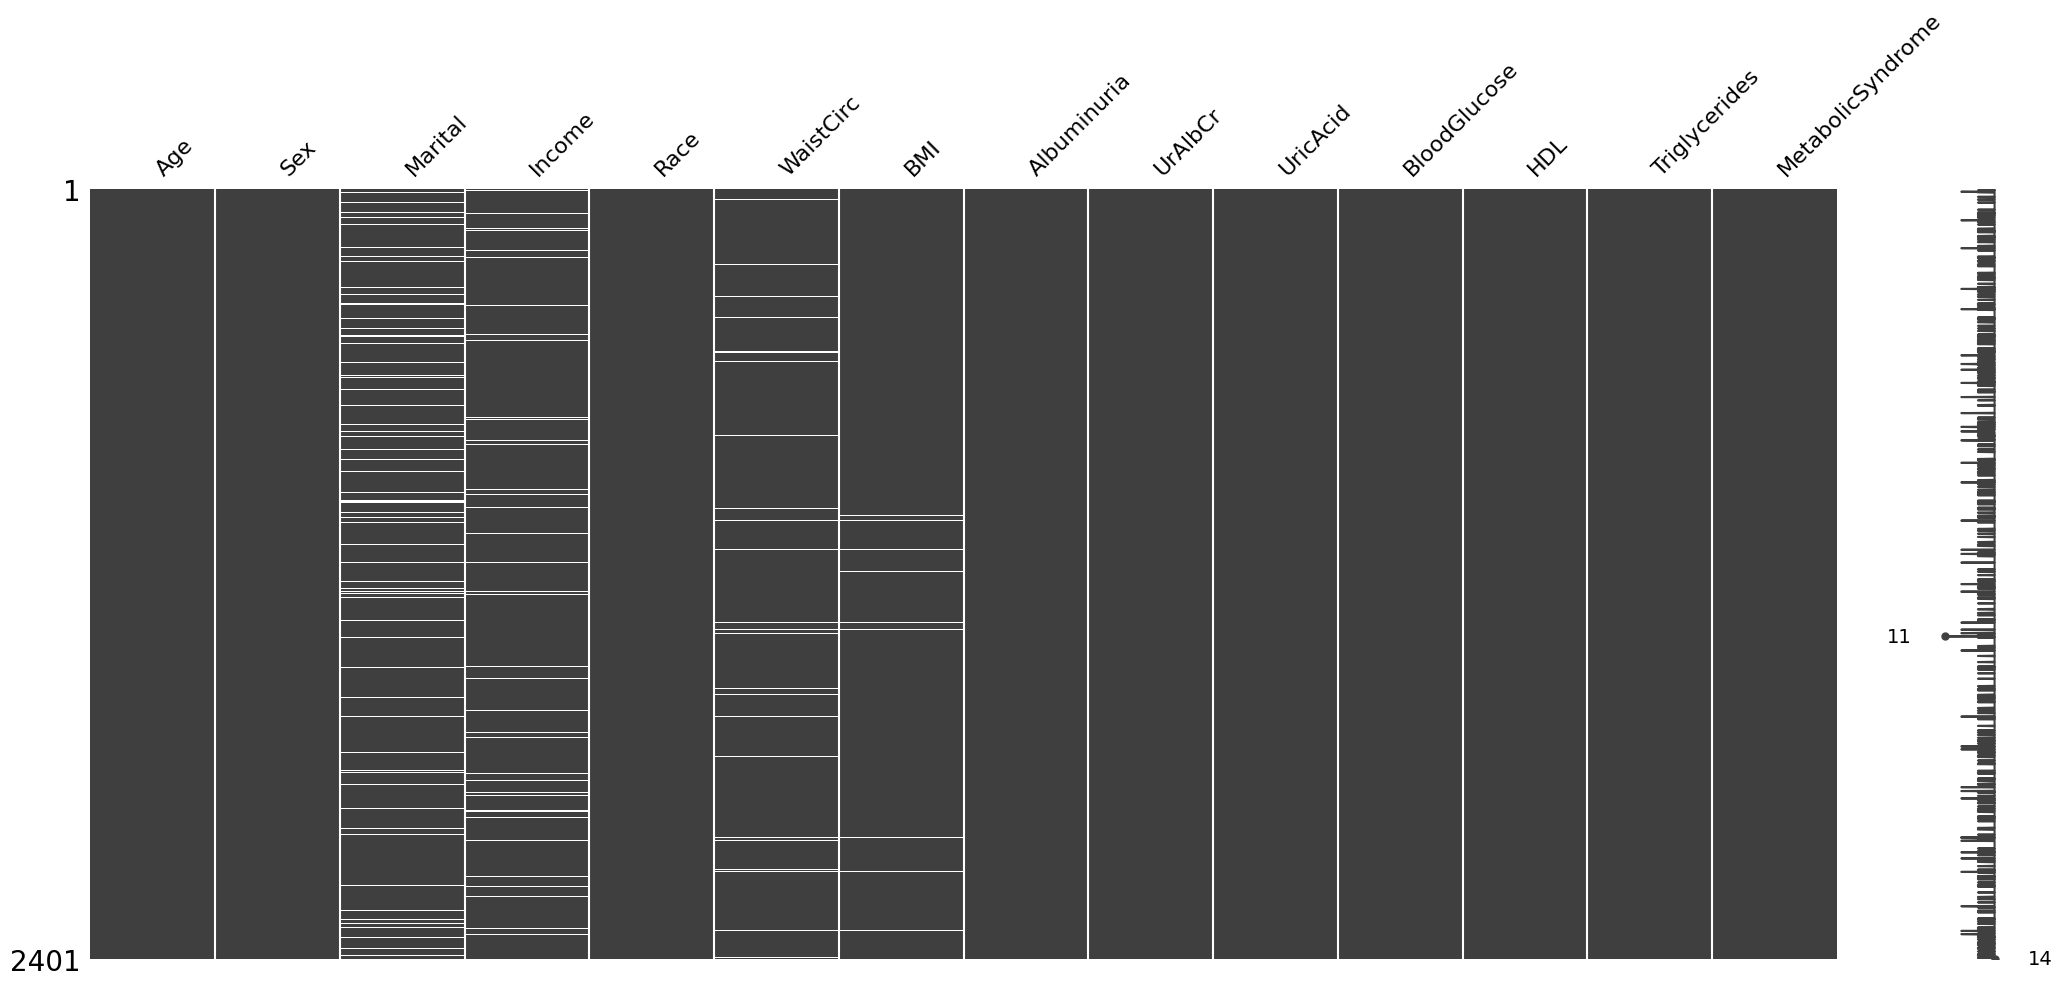

In [14]:
import missingno as msno
msno.matrix(df)

# Exploratory Visualizations

In [76]:
def explore_numeric(df, x, figsize=(12,3)):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

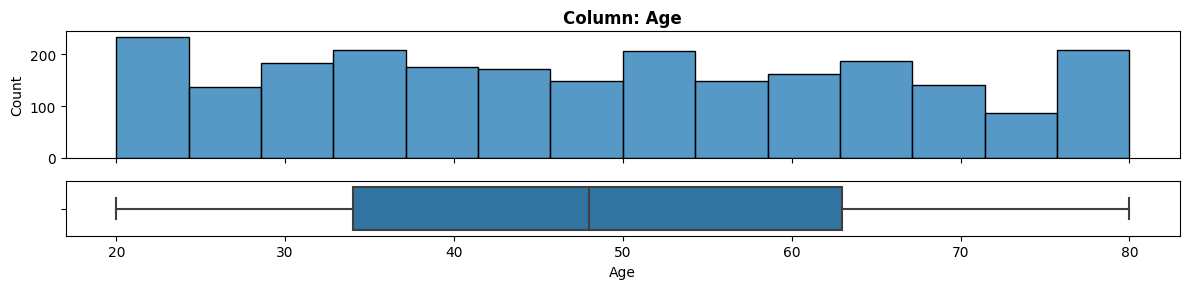

- NaN's Found: 0 (0.0%)
- Unique Values: 61
- Most common value: '80' occurs 124 times (5.16%)
- Not constant or quasi-constant.


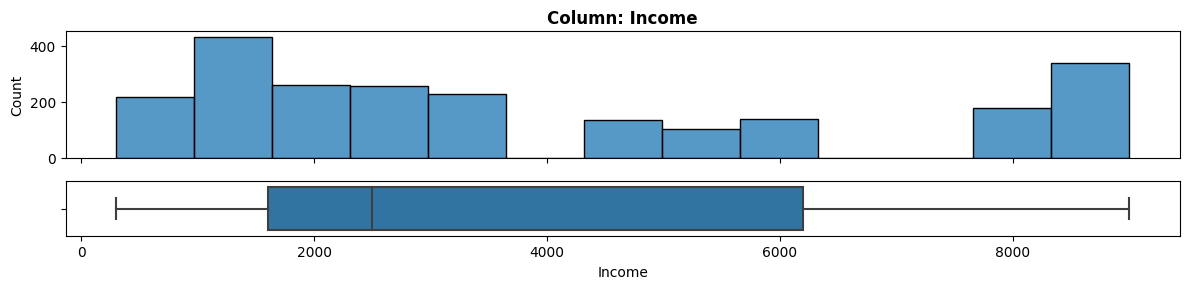

- NaN's Found: 117 (4.87%)
- Unique Values: 14
- Most common value: '9000.0' occurs 337 times (14.04%)
- Not constant or quasi-constant.


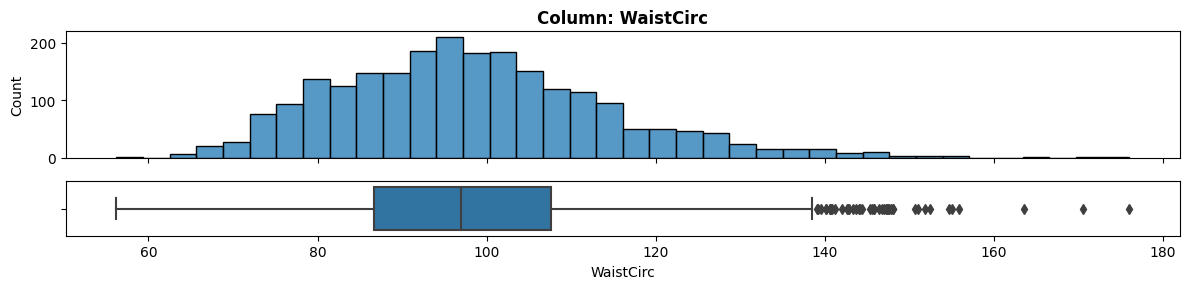

- NaN's Found: 85 (3.54%)
- Unique Values: 635
- Most common value: 'nan' occurs 85 times (3.54%)
- Not constant or quasi-constant.


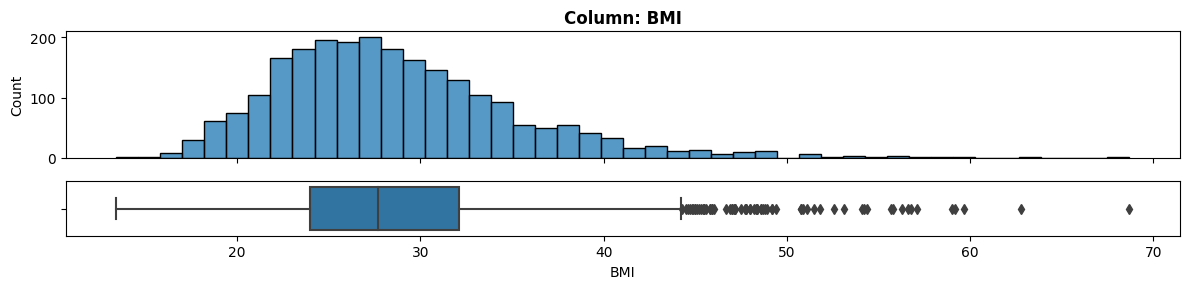

- NaN's Found: 26 (1.08%)
- Unique Values: 322
- Most common value: 'nan' occurs 26 times (1.08%)
- Not constant or quasi-constant.


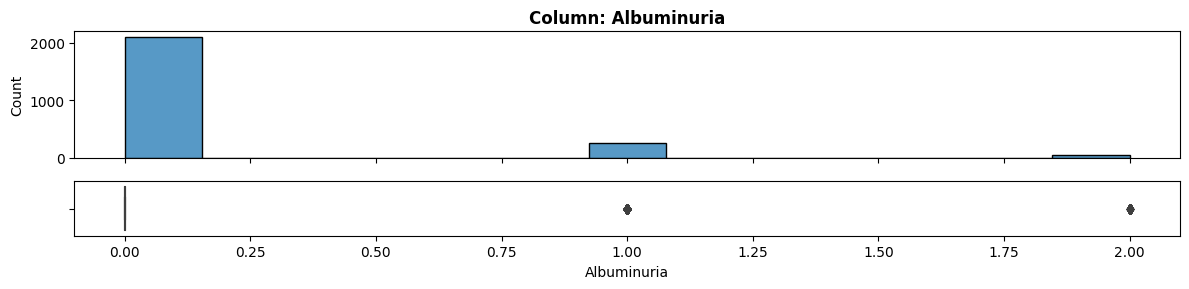

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: '0' occurs 2089 times (87.01%)
- Not constant or quasi-constant.


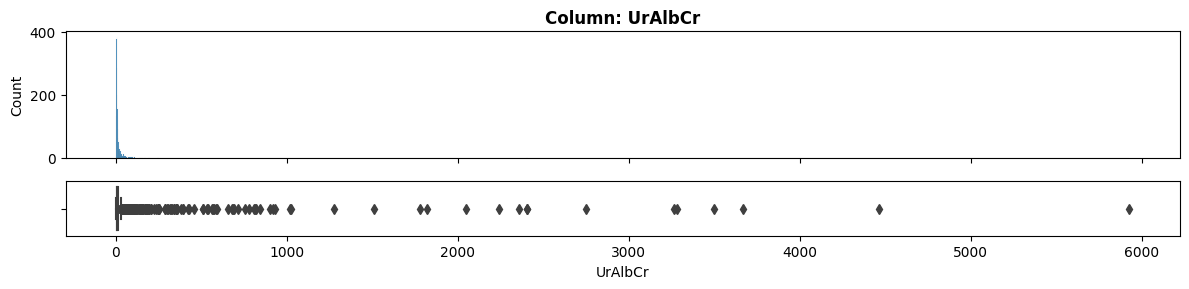

- NaN's Found: 0 (0.0%)
- Unique Values: 1383
- Most common value: '5.0' occurs 18 times (0.75%)
- Not constant or quasi-constant.


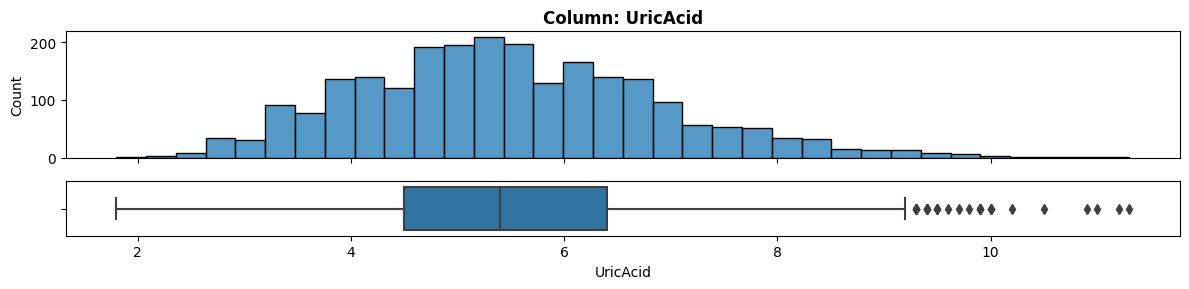

- NaN's Found: 0 (0.0%)
- Unique Values: 88
- Most common value: '5.2' occurs 77 times (3.21%)
- Not constant or quasi-constant.


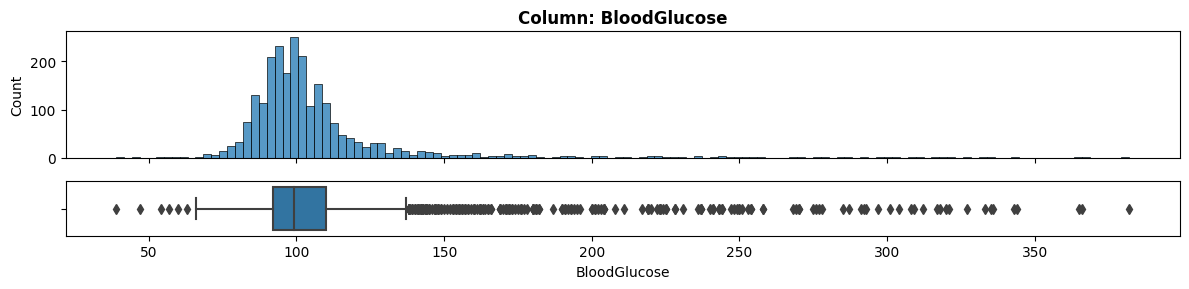

- NaN's Found: 0 (0.0%)
- Unique Values: 187
- Most common value: '97' occurs 90 times (3.75%)
- Not constant or quasi-constant.


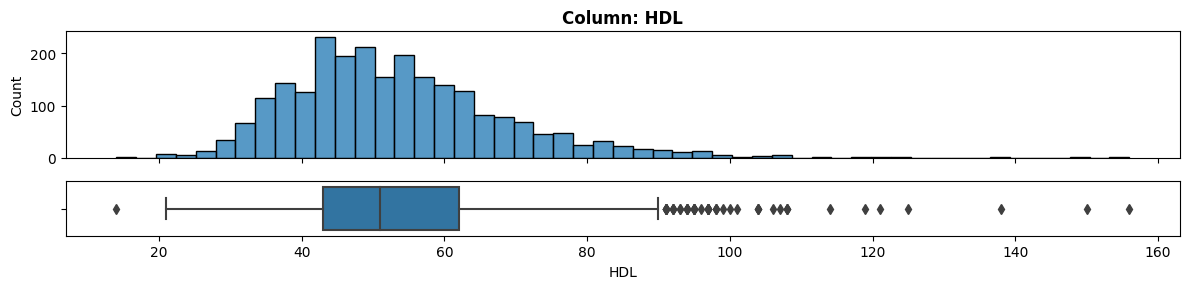

- NaN's Found: 0 (0.0%)
- Unique Values: 93
- Most common value: '48' occurs 87 times (3.62%)
- Not constant or quasi-constant.


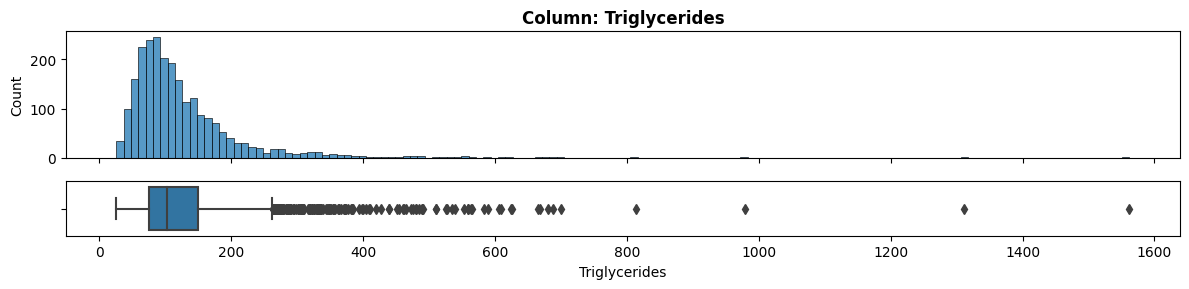

- NaN's Found: 0 (0.0%)
- Unique Values: 345
- Most common value: '75' occurs 34 times (1.42%)
- Not constant or quasi-constant.


In [77]:
# for Numeric Columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
  explore_numeric(df, col)

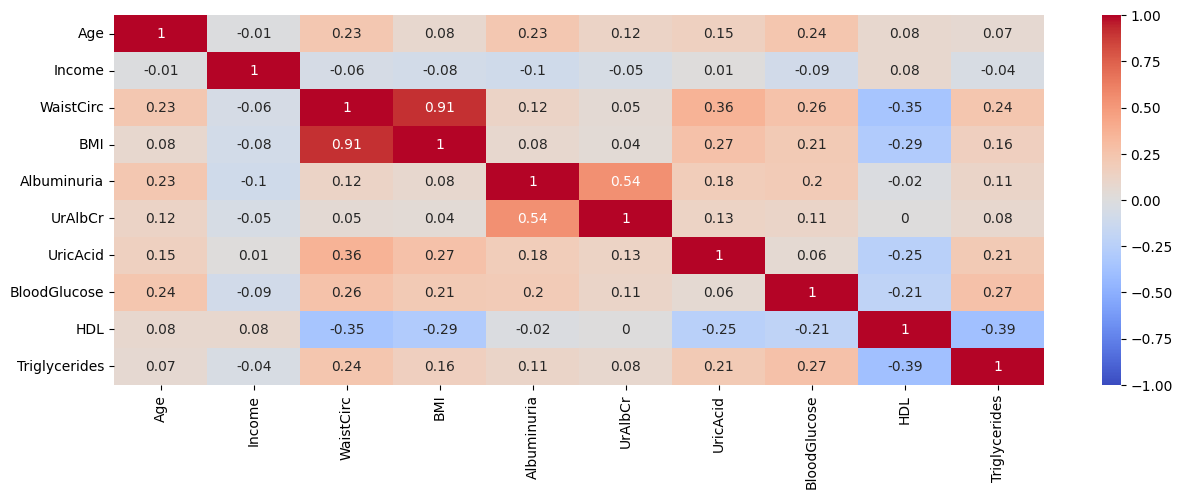

In [121]:
corr = df.corr(numeric_only=True).round(2)
ax = sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
ax.figure.set_figwidth(15,15);

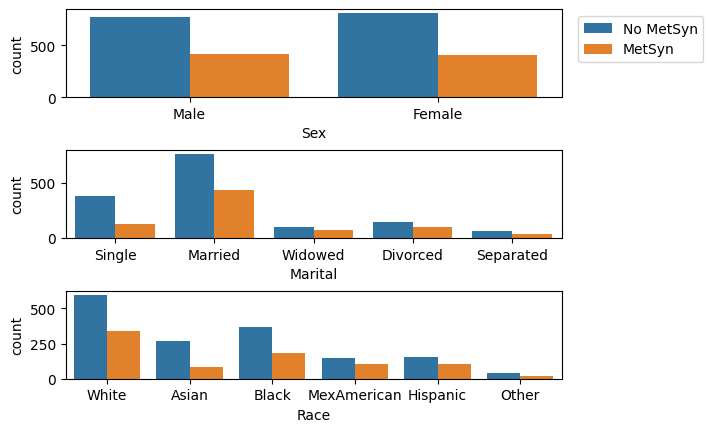

In [65]:
# for categorial features
fig, ax = plt.subplots(3)
plt.subplots_adjust(hspace=0.6)
sns.countplot(data=df, x='Sex', hue='MetabolicSyndrome', ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.3, 1))
sns.countplot(data=df, x='Marital', hue='MetabolicSyndrome', ax=ax[1])
ax[1].get_legend().remove()
sns.countplot(data=df, x='Race', hue='MetabolicSyndrome', ax=ax[2])
ax[2].get_legend().remove();

In [116]:
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg':
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white',linewidth=0.5,size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

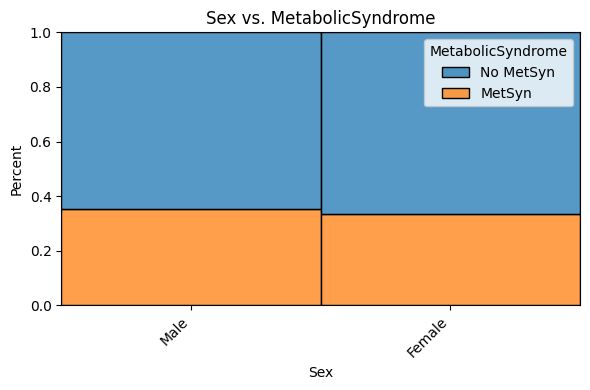

In [117]:
plot_categorical_vs_target(df, x='Sex', target_type='class', y=target);

# Preprocess data and fit a default model for Machine Learning

In [79]:
#  Sklearn Display
from sklearn import set_config
set_config(transform_output='pandas')
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

target='MetabolicSyndrome'
X = df.drop([target], axis=1)
y = df[target]
y.value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

In [80]:
# split the unbalanced data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)
X_train.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
seqn,,,,,,,,,,,,,
69151,57,Male,Married,9000.0,White,95.6,26.3,0,3.70,4.8,116,63,74
70567,80,Male,Married,1500.0,White,101.4,25.1,1,47.95,6.6,93,41,123
64333,46,Male,Divorced,2000.0,Asian,86.3,26.4,0,2.05,3.8,102,59,174
68115,80,Female,Widowed,2000.0,White,84.8,25.7,0,27.50,7.2,128,55,119
67719,35,Male,Married,8200.0,Black,82.3,24.6,2,569.08,7.1,39,69,113


In [82]:
num_impute = SimpleImputer(strategy='most_frequent')
num_scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(num_impute, num_scaler)

In [83]:
nom_impute= SimpleImputer(strategy='constant', fill_value = "Missing")
nom_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Create a categorical preprocessing pipeline
nom_pipe = make_pipeline(nom_impute, nom_encoder)

In [105]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Making a nominal_tuple for ColumnTransformer
nom_cols = list(cat_cols)
nom_cols.remove(target)
nom_tuple = ('nominal', nom_pipe, nom_cols)

# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, nom_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides'],
      dtype='object')),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Marital', 'Race'])],
                  verbose_feature_names_out=False)

In [106]:
# Fit on Train
col_transformer.fit(X_train)

# Transform Train and Test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)


In [109]:
from sklearn.ensemble import BaggingClassifier
# Instantiate a default model
bagtree = BaggingClassifier(random_state = 42)

# Fit the model pipeline on the training data only
bagtree.fit(X_train_tf, y_train)

BaggingClassifier(random_state=42)

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues',cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train': results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.99      1.00      0.99       616
   No MetSyn       1.00      0.99      1.00      1184

    accuracy                           1.00      1800
   macro avg       0.99      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



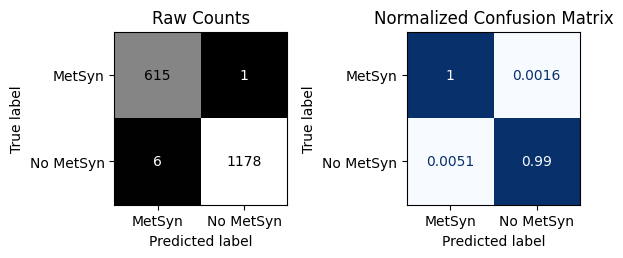

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.76      0.86      0.81       206
   No MetSyn       0.92      0.86      0.89       395

    accuracy                           0.86       601
   macro avg       0.84      0.86      0.85       601
weighted avg       0.87      0.86      0.86       601



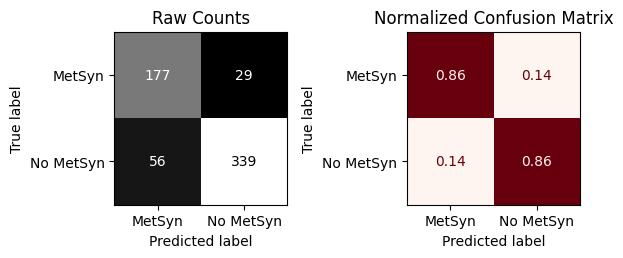

In [110]:
# Test the function
results = evaluate_classification(bagtree,X_train_tf, y_train, X_test_tf, y_test)

In [113]:

from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(bagtree, X_test_tf, y_test, n_repeats =8, random_state =42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [114]:
##  make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_tf.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

BloodGlucose         0.084651
Triglycerides        0.064060
HDL                  0.033902
WaistCirc            0.032862
Sex_Male             0.010191
Age                  0.008111
BMI                  0.004368
Marital_Married      0.002704
Sex_Female           0.002080
Race_MexAmerican     0.000832
Marital_Single       0.000832
Marital_Missing      0.000208
Race_Other           0.000000
Marital_Separated    0.000000
Race_White           0.000000
Marital_Widowed     -0.000208
Albuminuria         -0.000208
Race_Asian          -0.000624
UrAlbCr             -0.001872
Race_Black          -0.002080
Marital_Divorced    -0.002288
Race_Hispanic       -0.002912
Income              -0.003120
UricAcid            -0.003536
Name: permutation importance, dtype: float64

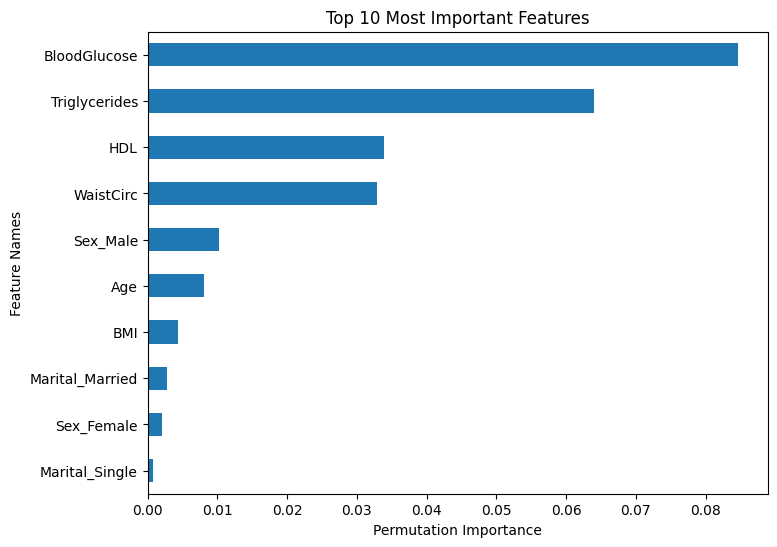

In [115]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

### The triglyceride, HDL, blood glucose, BMI, waist circumference, and age are straightforward and intuitively make sense in affecting the conditions of metabolic syndrome, given their roles as overall health factors in a broad context. Marital status and sex are not as direct but can still make sense.

In [118]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None
    # Plot the data
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

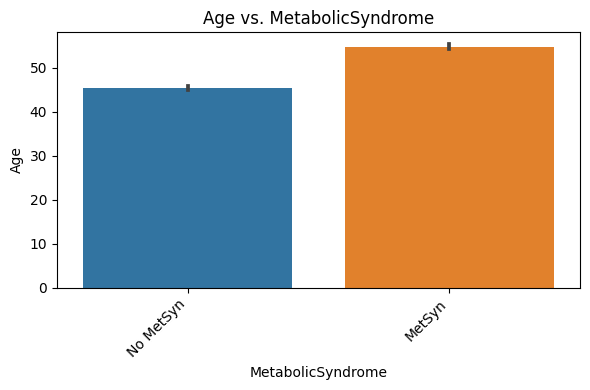

In [119]:
# Change the errorbar to "se"
plot_numeric_vs_target(df,'Age', target, target_type='class',estimator='mean',
                       sorted=True, ascending=True, errorbar='se');

### $\color{blue}{Interesting\ trend:}$
This plot illustrates how age relates to the presence of metabolic syndrome. Individuals with the syndrome tend to be older than those without it.

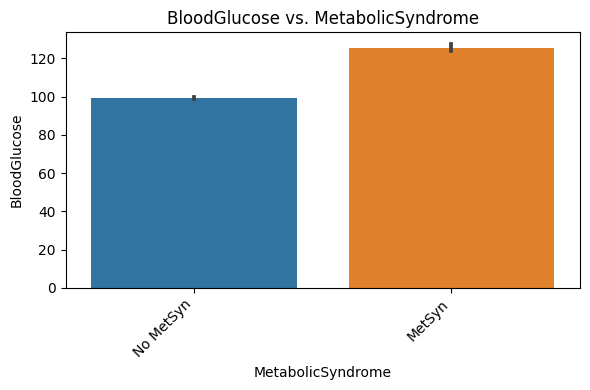

In [120]:
plot_numeric_vs_target(df,'BloodGlucose', target, target_type='class',estimator='mean',
                       sorted=True, ascending=True, errorbar='se');

### $\color{blue}{Interesting\ trend:}$
This plot illustrates how blood glucose levels relate to the presence of metabolic syndrome. Individuals with the syndrome tend to have higher levels than those without it.